Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Data/Train")
data_dir_test = pathlib.Path('Data/Test')

In [4]:
print('Classes available for training')
print('+++++++++++++++++++++++++++++++')
os.listdir(data_dir_train)

Classes available for training
+++++++++++++++++++++++++++++++


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f'Total Images available for training: {image_count_train}')
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f'Total Images available for testing: {image_count_test}')


Total Images available for training: 2239
Total Images available for testing: 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

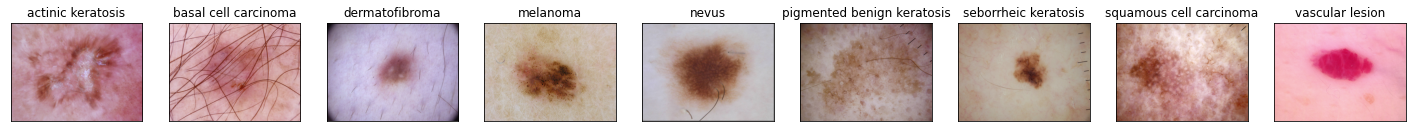

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,11))
for idx, image_class in enumerate(class_names):
    all_images_of_class = list(data_dir_train.joinpath(image_class).glob('*.jpg')) # List all the images for a particular class
    ax = fig.add_subplot(1, 9, 1 + idx, xticks=[], yticks=[])
    random_img_num = np.random.randint(len(all_images_of_class)) # Pick one random image of a class
    read_image = cv2.imread(str(all_images_of_class[random_img_num]))
    ax.set_title(image_class)
    plt.imshow(cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)) # Plot image in subplot


plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 128)       36992     
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 256)       2

### Train the model

In [15]:
epochs = 20

reducelr  = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=10, 
                              verbose=0, 
                              mode='auto', 
                              min_delta=0.002, 
                              cooldown=0, 
                              min_lr=0)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[reducelr]
)

Epoch 1/20
56/56 [==============================] - 109s 602ms/step - loss: 6.7682 - accuracy: 0.2900 - val_loss: 2.1899 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 14s 258ms/step - loss: 1.4689 - accuracy: 0.5062 - val_loss: 2.1819 - val_accuracy: 0.1812
Epoch 3/20
56/56 [==============================] - 15s 262ms/step - loss: 1.2792 - accuracy: 0.5460 - val_loss: 2.1633 - val_accuracy: 0.2841
Epoch 4/20
56/56 [==============================] - 15s 262ms/step - loss: 1.1761 - accuracy: 0.5870 - val_loss: 2.1355 - val_accuracy: 0.3781
Epoch 5/20
56/56 [==============================] - 7s 131ms/step - loss: 1.0813 - accuracy: 0.5990 - val_loss: 2.0374 - val_accuracy: 0.4430
Epoch 6/20
56/56 [==============================] - 4s 80ms/step - loss: 1.0326 - accuracy: 0.6279 - val_loss: 1.9151 - val_accuracy: 0.3960
Epoch 7/20
56/56 [==============================] - 4s 77ms/step - loss: 0.9627 - accuracy: 0.6587 - val_loss: 1.8204 - val_accuracy: 0.4340
Epo

### Visualizing training results

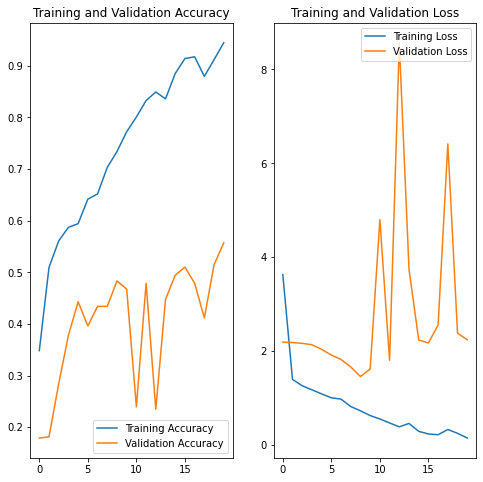

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### There is a clear evidence of model overfitting as there is considerable difference between the training accuracy and validation accuracy.

### The same trend can also be seen for the Training Loss and Validation Loss.

### When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples.

### Write your findings here

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomCrop(32, 32)
  ]
)

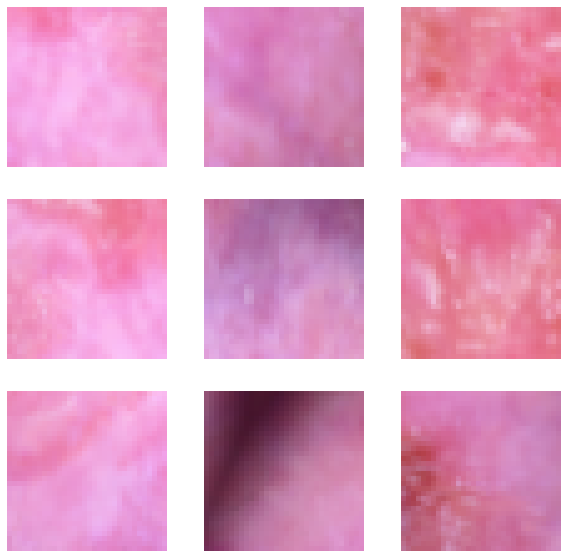

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Dropout(0.3),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20

reducelr  = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=10, 
                              verbose=0, 
                              mode='auto', 
                              min_delta=0.002, 
                              cooldown=0, 
                              min_lr=0)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[reducelr]
)

Epoch 1/20
56/56 [==============================] - 3s 20ms/step - loss: 2.0779 - accuracy: 0.1518 - val_loss: 2.0366 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 1s 13ms/step - loss: 2.0299 - accuracy: 0.1967 - val_loss: 2.0284 - val_accuracy: 0.1521
Epoch 3/20
56/56 [==============================] - 1s 13ms/step - loss: 2.0133 - accuracy: 0.2009 - val_loss: 2.0386 - val_accuracy: 0.2103
Epoch 4/20
56/56 [==============================] - 1s 13ms/step - loss: 1.9729 - accuracy: 0.2341 - val_loss: 2.0005 - val_accuracy: 0.2506
Epoch 5/20
56/56 [==============================] - 1s 13ms/step - loss: 1.9229 - accuracy: 0.2717 - val_loss: 1.7394 - val_accuracy: 0.3512
Epoch 6/20
56/56 [==============================] - 1s 13ms/step - loss: 1.8548 - accuracy: 0.3189 - val_loss: 1.7015 - val_accuracy: 0.3512
Epoch 7/20
56/56 [==============================] - 1s 13ms/step - loss: 1.7635 - accuracy: 0.3337 - val_loss: 1.7526 - val_accuracy: 0.3400
Epoch 8/20
56

### Visualizing the results

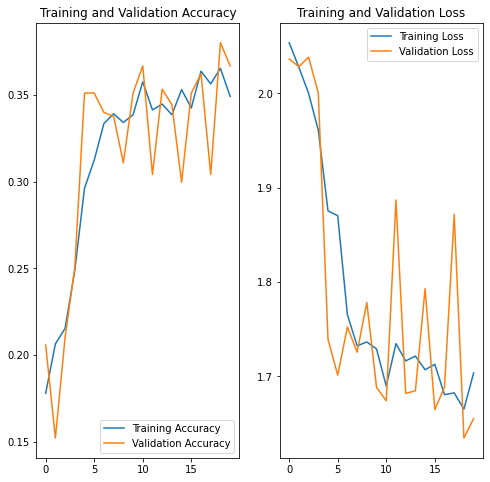

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There is some improvement in the model in terms of generalization over the validation images.
The model does not overfit but the model seems to underfit as there are very few images for some classes. Although the validation accuracy and training accuracy are comparable but both are suboptimal.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
## Your code goes here.
for image_class in class_names:
    n_images_per_class = len(list(data_dir_train.joinpath(image_class).glob('*.jpg')))
    print(f'No. of images for the class {image_class} is {n_images_per_class} ( {(n_images_per_class/image_count_train)*100:.2f} % of total images)')

No. of images for the class actinic keratosis is 114 ( 5.09 % of total images)
No. of images for the class basal cell carcinoma is 376 ( 16.79 % of total images)
No. of images for the class dermatofibroma is 95 ( 4.24 % of total images)
No. of images for the class melanoma is 438 ( 19.56 % of total images)
No. of images for the class nevus is 357 ( 15.94 % of total images)
No. of images for the class pigmented benign keratosis is 462 ( 20.63 % of total images)
No. of images for the class seborrheic keratosis is 77 ( 3.44 % of total images)
No. of images for the class squamous cell carcinoma is 181 ( 8.08 % of total images)
No. of images for the class vascular lesion is 139 ( 6.21 % of total images)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
-   `seborrheic keratosis` has the least number of samples in the dataset.
#### - Which classes dominate the data in terms proportionate number of samples?
-   As per the above observation, `Melanoma` and `pigmented benign keratosis` have the highest proportion of images.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
os.listdir()

['Data',
 'skin_cancer_model_30_epoch_reduced_lr.h5',
 'skin_cancer_model_50_epoch.h5',
 'skin_cancer_model_50_epoch_reduced_lr.h5',
 'Starter_Assignment_CNN_Skin_Cancer.ipynb',
 'Starter_code_Assignment_CNN_Skin_Cancer.ipynb',
 'Subhasis_Jethy_nn.ipynb']

In [26]:
path_to_training_dataset = os.path.join('Data','Train')
print(path_to_training_dataset)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + os.path.sep + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) ## We are adding 1000 samples per class to make sure that none of the classes are sparse.

Data\Train


Executing Pipeline:   0%|          | 0/1000 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Data\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D745F838B0>: 100%|██████████| 1000/1000 [00:06<00:00, 165.67 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D7974CE7F0>:   0%|          | 1/1000 [00:00<03:00,  5.52 Samples/s]

Initialised with 376 image(s) found.
Output directory set to Data\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D7404FA9D0>: 100%|██████████| 1000/1000 [00:07<00:00, 138.65 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D7432522B0>:   1%|          | 12/1000 [00:00<00:25, 38.43 Samples/s]

Initialised with 95 image(s) found.
Output directory set to Data\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D7974AEF10>: 100%|██████████| 1000/1000 [00:08<00:00, 116.78 Samples/s]
Executing Pipeline:   0%|          | 0/1000 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Data\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2D59F6EB040>: 100%|██████████| 1000/1000 [00:38<00:00, 25.82 Samples/s]
Executing Pipeline:   0%|          | 0/1000 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Data\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2D59F6BFBB0>: 100%|██████████| 1000/1000 [00:31<00:00, 31.30 Samples/s]
Executing Pipeline:   0%|          | 0/1000 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to Data\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D797664850>: 100%|██████████| 1000/1000 [00:08<00:00, 124.56 Samples/s]
Executing Pipeline:   0%|          | 0/1000 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Data\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2D7974AEE50>: 100%|██████████| 1000/1000 [00:14<00:00, 67.04 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2D797D6F160>:   1%|          | 9/1000 [00:00<02:06,  7.86 Samples/s]

Initialised with 181 image(s) found.
Output directory set to Data\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D743263730>: 100%|██████████| 1000/1000 [00:06<00:00, 149.17 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D7974AEFD0>:   1%|          | 9/1000 [00:00<00:52, 18.96 Samples/s]

Initialised with 139 image(s) found.
Output directory set to Data\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D797D69580>: 100%|██████████| 1000/1000 [00:06<00:00, 147.00 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [28]:
image_count_train_orig = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train_orig)

2239


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_original = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])


In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 1000 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
data_dir_train=   pathlib.Path("Data/Train") #"path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
## your code goes here

model=Sequential([
    # data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),   
    layers.Dense(9, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
## Your code goes here
# Mixed Precision FP16 training
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'  
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt = tf.train.experimental.enable_mixed_precision_graph_rewrite(opt)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Use tf.keras.mixed_precision. There is a guide at https://www.tensorflow.org/guide/mixed_precision. Alternatively, `tf.compat.v1.mixed_precision.enable_mixed_precision_graph_rewrite` can be used, but this is not recommended for TF2 code.
  opt = tf.keras.mixed_precision.experimental.LossScaleOptimizer(opt)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 178, 178, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 64)      256       
_________________________________________________

#### **Todo:**  Train your model

In [39]:
## Your code goes here, use 50 epochs.

epochs = 30

reducelr  = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=5, 
                              verbose=0, 
                              mode='auto', 
                              min_delta=0.002, 
                              cooldown=0, 
                              min_lr=0)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[reducelr]
)

Epoch 1/30
281/281 [==============================] - 123s 393ms/step - loss: 7.5823 - accuracy: 0.2045 - val_loss: 7.0496 - val_accuracy: 0.1785
Epoch 2/30
281/281 [==============================] - 92s 325ms/step - loss: 1.9185 - accuracy: 0.2867 - val_loss: 5.6229 - val_accuracy: 0.1486
Epoch 3/30
281/281 [==============================] - 108s 382ms/step - loss: 1.7328 - accuracy: 0.3359 - val_loss: 44.5861 - val_accuracy: 0.1166
Epoch 4/30
281/281 [==============================] - 97s 344ms/step - loss: 1.6177 - accuracy: 0.3777 - val_loss: 6.2057 - val_accuracy: 0.1433
Epoch 5/30
281/281 [==============================] - 99s 348ms/step - loss: 1.4796 - accuracy: 0.4216 - val_loss: 2.3737 - val_accuracy: 0.1998
Epoch 6/30
281/281 [==============================] - 104s 366ms/step - loss: 1.3619 - accuracy: 0.4792 - val_loss: 2.8374 - val_accuracy: 0.3289
Epoch 7/30
281/281 [==============================] - 97s 341ms/step - loss: 1.2449 - accuracy: 0.5216 - val_loss: 5.7377 - va

#### **Todo:**  Visualize the model results

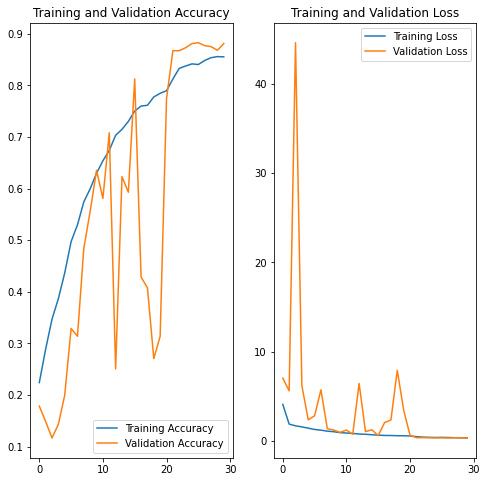

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### The results are comparatively better than previous experiments.
#### The problem of overfitting has been addressed as the gap between training and validatoin accuracies and
#### the training loss and validation loss has been narrowed down.
#### The class imbalance seems to have helped in addressing the underfitting as well.


In [47]:
model.save('skin_cancer_model_30_epoch_reduced_lr.h5')

In [48]:
loaded_model = tf.keras.models.load_model('skin_cancer_model_30_epoch_reduced_lr.h5')

In [49]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 178, 178, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 64)      256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 89, 89, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 89, 89, 128)      

In [50]:
loaded_model.evaluate(train_ds)

281/281 [==============================] - 58s 204ms/step - loss: 0.1231 - accuracy: 0.9514


[0.12313281744718552, 0.9514012336730957]

In [51]:
loaded_model.evaluate(val_ds)

71/71 [==============================] - 16s 214ms/step - loss: 0.3410 - accuracy: 0.8807


[0.3410124182701111, 0.8807298541069031]

### The validation accuracy with the final model is `88.07 %`. 